# 色々な確率分布

* 黒木玄
* 2022-04-11～2022-04-18
$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#正規分布" data-toc-modified-id="正規分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正規分布</a></span><ul class="toc-item"><li><span><a href="#正規分布のロケーションスケール変換も正規分布" data-toc-modified-id="正規分布のロケーションスケール変換も正規分布-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>正規分布のロケーションスケール変換も正規分布</a></span></li><li><span><a href="#問題:-正規分布の平均と分散" data-toc-modified-id="問題:-正規分布の平均と分散-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>問題: 正規分布の平均と分散</a></span></li><li><span><a href="#問題:-正規分布に従う独立な確率変数達の和も正規分布に従う" data-toc-modified-id="問題:-正規分布に従う独立な確率変数達の和も正規分布に従う-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>問題: 正規分布に従う独立な確率変数達の和も正規分布に従う</a></span></li><li><span><a href="#問題:-正規分布における確率がほぼ95%または99%になる区間" data-toc-modified-id="問題:-正規分布における確率がほぼ95%または99%になる区間-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>問題: 正規分布における確率がほぼ95%または99%になる区間</a></span></li><li><span><a href="#問題:-正規分布のモーメント母函数とキュムラント母函数" data-toc-modified-id="問題:-正規分布のモーメント母函数とキュムラント母函数-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>問題: 正規分布のモーメント母函数とキュムラント母函数</a></span></li><li><span><a href="#問題:-キュムラント母函数と期待値と分散" data-toc-modified-id="問題:-キュムラント母函数と期待値と分散-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>問題: キュムラント母函数と期待値と分散</a></span></li><li><span><a href="#問題:-対数正規分布の確率密度函数" data-toc-modified-id="問題:-対数正規分布の確率密度函数-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>問題: 対数正規分布の確率密度函数</a></span></li><li><span><a href="#問題:-対数正規分布の期待値と分散" data-toc-modified-id="問題:-対数正規分布の期待値と分散-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>問題: 対数正規分布の期待値と分散</a></span></li></ul></li><li><span><a href="#Poisson分布" data-toc-modified-id="Poisson分布-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Poisson分布</a></span><ul class="toc-item"><li><span><a href="#Poisson分布の定義" data-toc-modified-id="Poisson分布の定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Poisson分布の定義</a></span></li><li><span><a href="#問題:-Poisson分布のキュムラント母函数と期待値と分散" data-toc-modified-id="問題:-Poisson分布のキュムラント母函数と期待値と分散-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>問題: Poisson分布のキュムラント母函数と期待値と分散</a></span></li><li><span><a href="#二項分布の連続時間極限" data-toc-modified-id="二項分布の連続時間極限-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>二項分布の連続時間極限</a></span></li><li><span><a href="#Poisson分布の中心極限定理と二項分布の中心極限定理の関係" data-toc-modified-id="Poisson分布の中心極限定理と二項分布の中心極限定理の関係-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Poisson分布の中心極限定理と二項分布の中心極限定理の関係</a></span></li><li><span><a href="#Poisson分布の中心極限定理の直接証明" data-toc-modified-id="Poisson分布の中心極限定理の直接証明-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Poisson分布の中心極限定理の直接証明</a></span></li><li><span><a href="#Poisson分布の階層化によって負の二項分布が得られる" data-toc-modified-id="Poisson分布の階層化によって負の二項分布が得られる-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Poisson分布の階層化によって負の二項分布が得られる</a></span></li></ul></li><li><span><a href="#ガンマ分布" data-toc-modified-id="ガンマ分布-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ガンマ分布</a></span><ul class="toc-item"><li><span><a href="#負の二項分布の連続時間極限" data-toc-modified-id="負の二項分布の連続時間極限-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>負の二項分布の連続時間極限</a></span></li><li><span><a href="#χ²分布" data-toc-modified-id="χ²分布-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>χ²分布</a></span></li></ul></li><li><span><a href="#ベータ分布" data-toc-modified-id="ベータ分布-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ベータ分布</a></span><ul class="toc-item"><li><span><a href="#一様分布の順序統計量" data-toc-modified-id="一様分布の順序統計量-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>一様分布の順序統計量</a></span></li><li><span><a href="#t分布" data-toc-modified-id="t分布-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>t分布</a></span></li><li><span><a href="#F分布" data-toc-modified-id="F分布-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>F分布</a></span></li><li><span><a href="#二項分布とベータ分布の累積分布函数の関係" data-toc-modified-id="二項分布とベータ分布の累積分布函数の関係-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>二項分布とベータ分布の累積分布函数の関係</a></span></li></ul></li></ul></div>

In [2]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

## 正規分布

$\mu, \sigma\in\R$, $\sigma > 0$ と仮定する.  確率密度函数

$$
p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

で定義される連続分布を平均 $\mu$, 分散 $\sigma^2$ (標準偏差 $\sigma$)の __正規分布__ (normal distribution)と呼び, $\op{Normal}(\mu,\sigma)$ と書くのであった.

さらに, 平均 $0$, 分散 $1^2$ の正規分布を __標準正規分布__ (standard normal distribution)と呼び, $\op{Normal}()$ と書くのであった. 標準正規分布の密度函数は次の形になる:

$$
p(z) = \frac{e^{-z^2/2}}{\sqrt{2\pi}}.
$$

### 正規分布のロケーションスケール変換も正規分布

$a,b\in\R$, $a\ne 0$ と仮定する. 一般に確率変数 $X$ について,

$$
E[aX+b] = aE[X]+b, \quad \var(aX+b) = a^2\var(X)
$$

が成立するのであった.  $X$ が正規分布に従う確率変数の場合には $aX+b$ も正規分布に従うことを示せる. 実際, $X\sim\op{Normal}(\mu,\sigma)$ のとき, $y = ax + b$ すなわち $x = (y - b)/a$ とおくと,

$$
\begin{aligned}
E[f(aX+b)] &=
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty f(ax+b) \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx
\\ &=
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty f(y) \exp\left(-\frac{((y-b)/a-\mu)^2}{2\sigma^2}\right)\,\frac{dy}{|a|}
\\ &=
\frac{1}{\sqrt{2\pi(a^2\sigma)^2}}
\int_{-\infty}^\infty f(y) \exp\left(-\frac{(y-(a\mu+b))^2}{2a^2\sigma^2}\right)\,dy
\end{aligned}
$$

なので, $aX+b$ は平均 $a\mu+b$, 分散 $a^2\sigma^2$ の正規分布に従う: $aX+b\sim\op{Normal}(a\mu + b, |a|\sigma)$.

### 問題: 正規分布の平均と分散

分布 $\op{Normal}(\mu, \sigma)$ の平均と分散がそれぞれ $\mu$, $\sigma^2$ になることを示せ.

__解答例1:__ すでに標準正規分布 $\op{Normal}(0,1)$ の平均と分散がそれぞれ $0$ と $1^2$ になることは示してある. $X \sim \op{Normal}(\mu, \sigma)$ のとき, $Z = (X - \mu)/\sigma$ とおくと $Z\sim\op{Normal}((\mu-\mu)/\sigma, \sigma/\sigma) = \op{Normal}(0, 1)$ となるので, $X = \sigma Z + \mu$ の平均と分散はそれぞれ $\sigma\cdot0+\mu=\mu$, $\sigma^2\cdot 1^2 = \sigma^2$ になる.

__解答終__

__解答例2:__ 直接的に計算してみよう. $X \sim \op{Normal}(\mu, \sigma)$ のとき, 積分変数を $x = \sigma z + \mu$ と変換すると,

$$
E[X] =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty x e^{-(x-\mu)^2/(2\sigma^2)}\,dx =
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty (\sigma z+\mu) e^{-z^2/2}\,dz =
\mu.
$$
最後の等号で $\int_{-\infty}^\infty z e^{-z^2/2}\,dz = 0$ と $\int_{-\infty}^\infty e^{-z^2/2}\,dy = \sqrt{2\pi}$ を使った.  この結果を使うと,

$$
\op{var}(X) = E[(X-\mu)^2] =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty (x-\mu)^2 e^{-(x-\mu)^2/(2\sigma^2)}\,dx =
\frac{1}{\sqrt{2\pi}}\int_{-\infty}^\infty \sigma^2 z^2 e^{-z^2/2}\,dx = \sigma^2.
$$

最後の等号で $\int_{-\infty}^\infty z^2 e^{-z^2/2}\,dz = \sqrt{2\pi}$ を使った. この結果は

$$
\int_{-\infty}^\infty e^{-\alpha z^2}\,dz = \sqrt{\pi}\,\alpha^{-1/2}
$$

の両辺を $\alpha$ で微分して $-1$ 倍して $\alpha=1/2$ とおいても得られるし, ガンマ函数に帰着する方法でも得られる.

__解答終__

### 問題: 正規分布に従う独立な確率変数達の和も正規分布に従う

$X$, $Y$ はともに正規分布に従う独立な確率変数達であるとき, $X+Y$ も正規分布に従うことを示せ.  $X+Y$ の平均と分散は $X$, $Y$ の平均と分散でどのように表されるか?

__解答例:__ $X\sim\op{Normal}(\mu_X, \sigma_X)$, $Y\sim\op{Normal}(\mu_Y, \sigma_Y)$ でかつ $X,Y$ は独立であると仮定する.

$X,Y$ は独立なので $X+Y$ の平均と分散はそれぞれ $\mu_X + \mu_Y$, $\sigma_X^2 + \sigma_Y^2$ になる.

$X'=X-\mu_X$, $Y'=Y-\mu_Y$ とおくと, $X'\sim\op{Normal}(0,\sigma_X)$, $Y\sim\op{Normal}(0,\sigma_Y)$, $X+Y = (X'+Y') + (\mu_X+\mu_Y)$ となるので, $X'+Y'$ が正規分布に従うことを示せば十分である.  ゆえに $\mu_X=0$, $\mu_Y=0$ と仮定してよいので, そのように仮定する. 

$X+Y$ の確率密度函数を計算して, それが正規分布の密度函数になっていることを示せばよい. 

$$
E[f(X+Y)] =
\frac{1}{\sqrt{(2\pi)^2\sigma_X^2\sigma_Y^2}}
\iint_{\R^2} f(x+y) \exp\left(-\frac{1}{2}\left(
\frac{x^2}{\sigma_X^2}+\frac{y^2}{\sigma_Y^2}
\right)\right)\,dx\,dy
$$

であり, $x = x + y$ すなわち $y = z - x$ とおいて, $x$ について平方完成すると,

$$
\frac{x^2}{\sigma_X^2}+\frac{y^2}{\sigma_Y^2} =
\frac{x^2}{\sigma_X^2}+\frac{(z-x)^2}{\sigma_Y^2} =
\frac{\sigma_X^2+\sigma_Y^2}{\sigma_X^2\sigma_Y^2}
\left(x - \frac{\sigma_X^2 z}{\sigma_X^2+\sigma_Y^2}\right)^2 +
\frac{z^2}{\sigma_X^2 + \sigma_Y^2}.
$$

となる(この計算を自分で実行してみること).  ゆえに,

$$
\begin{aligned}
&
E[f(X+Y)]
\\ &=
\frac{1}{\sqrt{(2\pi)^2\sigma_X^2\sigma_Y^2}}
\int_\R\left(\int_\R f(z) \exp\left(-
\frac{\sigma_X^2+\sigma_Y^2}{2\sigma_X^2\sigma_Y^2}
\left(x - \frac{\sigma_X^2 z}{\sigma_X^2+\sigma_Y^2}\right)^2 -
\frac{z^2}{2(\sigma_X^2 + \sigma_Y^2)}
\right)\,dx\right)\,dz
\\ &=
\frac{1}{\sqrt{(2\pi)^2\sigma_X^2\sigma_Y^2}}
\sqrt{\frac{2\pi\sigma_X^2\sigma_Y^2}{\sigma_X^2+\sigma_Y^2}}
\int_\R f(z) \exp\left( -\frac{z^2}{2(\sigma_X^2 + \sigma_Y^2)} \right)\,dz
\\ &=
\frac{1}{\sqrt{2\pi(\sigma_X^2+\sigma_Y^2)}}
\int_\R f(z) \exp\left( -\frac{z^2}{2(\sigma_X^2 + \sigma_Y^2)} \right)\,dz
\end{aligned}
$$

以上によって $X+Y\sim\op{Normal}(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$ を示せた.

$z = x + y$, $y = z - x$ とおくと密度函数中の指数函数の中身が $z$ についでの二次式になることから, $Z = X+Y$ が正規分布に従うことは計算しなくても明らかだと考えることもできる. 上のように $z$ 以外の変数は積分して消せる.  そして, $Z=X+Y$ の期待値は $X,Y$ の期待値の和になり, $X,Y$ が独立という仮定からそれらは無相関になるので $Z=X+Y$ の分散は $X,Y$ の分散の和になることもわかる. これだけで $X+Y\sim\op{Normal}(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$ を証明でいたともみなせる.

__解答終__

上の解答中の最も面倒な部分の計算が正しいことはコンピュータで以下のように確認できる.

$a=\sigma_X^2$, $b=\sigma_Y^2$ とおくと,

In [2]:
@vars a b x z
(a+b)/(a*b)*(x - a*z/(a+b))^2 + z^2/(a+b) - x^2/a - (z-x)^2/b |> simplify

0

以下のように素朴に計算することもできる.

In [3]:
@vars a b positive=true
@vars x y z t
expr = x^2/a + y^2/b

 2    2
y    x 
-- + --
b    a 

In [4]:
expr = expr(y=>z-x).expand()

 2            2    2
x    2*x*z   z    x 
-- - ----- + -- + --
b      b     b    a 

In [5]:
A, B = 1/a+1/b, z/b
expr = sympy.poly(expr(x => t + B/A), t) 

Poly((a + b)/(a*b)*t**2 + z**2/(a + b), t, domain='ZZ(z,a,b)')

In [6]:
# 以下のセルでの説明で使う図の準備

μ, σ, c = 2, 3, 1.5
normal = Normal(μ, σ)

P1 = plot(normal, μ - 4σ, μ + 4σ; label="Normal(μ,σ)", xlabel="x = σz + μ")
vline!([μ]; label="x=μ", xtick = ([μ-c*σ, μ, μ+c*σ], ["μ-cσ", "μ", "μ+cσ"]), ytick=false)
plot!(normal, μ - 4σ, μ - c*σ; label="", c=1, frange=0, fc=:red, fa=0.5)
plot!(normal, μ + c*σ, μ + 4σ; label="", c=1, frange=0, fc=:red, fa=0.5)
annotate!(μ - 1.3c*σ, 0.8pdf(normal, μ - c*σ), ("P(X≤μ-cσ)", 10, :red, :right))
annotate!(μ - 1.5c*σ, 0.5pdf(normal, μ - c*σ), ("= α/2", 10, :red, :right))
annotate!(μ + 1.5c*σ, 0.5pdf(normal, μ + c*σ), ("= α/2", 10, :red, :left))
annotate!(μ + 1.3c*σ, 0.8pdf(normal, μ + c*σ), ("1-P(X≥μ+cσ)", 10, :red, :left))

P2 = plot(Normal(), -4, 4; label="Normal(0,1)", xlabel="z = (x - μ)/σ")
vline!([0]; label="z=0", xtick = ([-c, 0, c], ["-c", "0", "c"]), ytick=false)
plot!(Normal(), -4, -c; label="", c=1, frange=0, fc=:red, fa=0.5)
plot!(Normal(),  c,  4; label="", c=1, frange=0, fc=:red, fa=0.5)
annotate!(-1.3c, 0.8pdf(Normal(), -c), ("P(Z≤-c)", 10, :red, :right))
annotate!(-1.5c, 0.5pdf(Normal(), -c), ("= α/2", 10, :red, :right))
annotate!( 1.5c, 0.5pdf(Normal(),  c), ("= α/2", 10, :red, :left))
annotate!( 1.3c, 0.8pdf(Normal(),  c), ("1-P(Z≥c)", 10, :red, :left))

var"P(μ-cσ ≤ X ≤ μ+cσ) = 1-α ⟺ 1 - P(Z ≤ c) = α/2" =
    plot(P1, P2; size=(800, 250), bottommargin=4Plots.mm);

### 問題: 正規分布における確率がほぼ95%または99%になる区間

$X \sim \op{Normal}(\mu, \sigma)$ であると仮定する.  このとき, $X$ が区間 $[\mu-c\sigma, \mu+c\sigma]$ に含まれる確率

$$
P(\mu-c\sigma \le X \le \mu+c\sigma)
$$

が $95\%$ になる $c$ と $99\%$ になる $c$ を小数点以下第2桁目まで求めよ.

__解答例:__ 標準正規分布の場合の計算に帰着することを考えよう.

$Z = (X - \mu)/\sigma$ とおくと $Z$ は標準正規分布に従うのであった: $Z \sim \op{Normal}(0,1)$. このとき,

$$
\mu-c\sigma \le X \le \mu+c\sigma \iff -c \le Z = \frac{X-\mu}{\sigma} \le c
$$

なので, 標準正規分布に従う確率変数 $Z$ について $P(-c \le Z \le c)$ が $95\%$ になる $c$ と $99\%$ になる $c$ を求めればよい.  正規分布は左右対称なので, $P(-c \le Z \le c) = 1 - \alpha$ となることと, $1 - P(Z \le c) = \alpha/2$ すなわち

$$
P(Z \le c) = 1 - \alpha/2
$$

となることは同値である. 下の図を見よ.

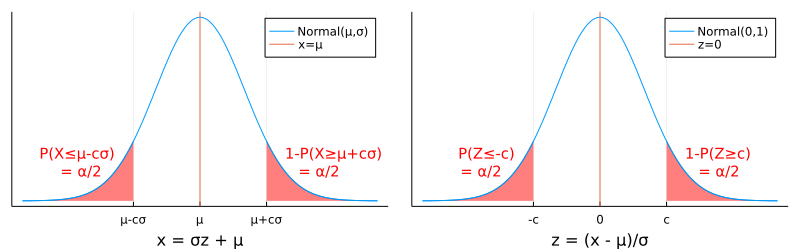

In [7]:
var"P(μ-cσ ≤ X ≤ μ+cσ) = 1-α ⟺ 1 - P(Z ≤ c) = α/2"

$F(z) = P(Z \le z)$ は標準正規分布の累積分布函数である. 標準正規分布の累積分布函数はコンピュータでの基本特殊函数ライブラリに含まれている誤差函数

$$
\op{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \exp(-u^2) \,du
$$

を使えば

$$
F(z) = \frac{1 + \op{erf}(z/\sqrt{2})}{2}.
$$

と書けるのであった. ゆえに誤差函数の逆函数 $\op{erfinv}(y)$ (この函数のコンピュータでの基本特殊函数ライブラリに含まれている)を使えば, 標準正規分布の累積分布函数 $F(z)$ の逆函数(分位点函数)は

$$
Q(p) = F^{-1}(p) = \sqrt{2}\,\op{erfinv}(2p - 1)
$$

と書ける.  これを使えば $P(Z \le c) = 1 - \alpha/2$ となる $c$ を

$$
c = Q(1 - \alpha/2) = \sqrt{2}\,\op{erfinv}(1 - \alpha)
$$

と求めることができる.

* $1-\alpha=95\%$ のとき, $c = \sqrt{2}\,\op{erfinv}(1 - \alpha) \approx 1.96$
* $1-\alpha=99\%$ のとき, $c = \sqrt{2}\,\op{erfinv}(1 - \alpha) \approx 2.58$

__解答終__

[Julia言語](https://julialang.org/)では以下のように計算できる. (ただし, `using SpecialFunctions, Distributions` が必要.)

In [8]:
√2 * erfinv(0.95), quantile(Normal(), 0.975)

(1.9599639845400576, 1.9599639845400576)

In [9]:
√2 * erfinv(0.99), quantile(Normal(), 0.995)

(2.5758293035489053, 2.5758293035489053)

[WolframAlpha](https://www.wolframalpha.com/)では以下のように計算できる.

* [√2 erfinv(0.95)](https://www.wolframalpha.com/input?i=%E2%88%9A2+erfinv%280.95%29), [quantile(NormalDistribution(0,1), 0.975)](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.975%2)
* [√2 erfinv(0.99)](https://www.wolframalpha.com/input?i=%E2%88%9A2+erfinv%280.99%29), [quantile(NormalDistribution(0,1), 0.995)](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.995%29)

### 問題: 正規分布のモーメント母函数とキュムラント母函数

$X \sim \op{Normal}(\mu, \sigma)$ のとき次が成立することを示せ:

$$
E[e^{tX}] = e^{\mu t + \sigma^2 t^2/2}, \quad
\log E[e^{tX}] = \mu t + \sigma^2 \frac{t^2}{2}.
$$

__注意:__ 一般に確率変数 $X$ に対して, $E[e^{tX}]$ を $X$ の __モーメント母函数__ (moment generating function, mgf)と呼び, $\log E[e^{tX}]$ を $X$ の __キュムラント母函数__ (cumulant generating function, cgf)と呼ぶ. 

__注意:__ 正規分布のキュムラント母函数は上のように非常に単純な形になる. キュムラント母函数が $t$ について2次式になることと分布が正規分布であることは同値であり, キュムラント母函数中の $t$ について3次以上の項は分布が正規分布とどのように違うかを表している.  特にそのうちの最初の2つである $t^3/3!$ と $t^4/4!$ の係数はそれぞれ __歪度__ (わいど, skewness) と __尖度__ (せんど, kurtosis)と呼ばれている.

__注意:__ モーメント母函数とキュムラント母函数は物理での統計力学での分配函数と自由エネルギーの統計学での類似物になっており, 極めて便利な母函数になっている. 上の $t$ は物理的には逆温度 $\beta$ の $-1$ 倍の $-\beta$ に対応している.

__解答例:__ 

$$
\begin{aligned}
tx - \frac{(x-\mu)^2}{2\sigma^2} &= -
\frac{(x-\mu)^2 - 2\sigma^2 tx}{2\sigma^2} = -
\frac{x^2 - 2(\mu + \sigma^2 t) x + \mu^2}{2\sigma^2} \\ &= -
\frac{(x - (\mu + \sigma^2 t))^2 + \mu^2 - (\mu + \sigma^2 t)^2}{2\sigma^2} \\ &= -
\frac{(x - (\mu + \sigma^2 t))^2 - 2\sigma^2\mu t + \sigma^4 t^2}{2\sigma^2} \\ &= -
\frac{(x - (\mu + \sigma^2 t))^2}{2\sigma^2} + \mu t + \sigma^2\frac{t^2}{2}
\end{aligned}
$$

より

$$
\begin{aligned}
E[e^{tX}] &=
\frac{1}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty e^{tx} e^{-(x-\mu)^2)/(2\sigma^2)}\,dx \\ &=
\frac{e^{\mu t+\sigma^2 t^2/2}}{\sqrt{2\pi\sigma^2}}
\int_{-\infty}^\infty e^{-(x-(\mu+\sigma^2 t))^2)/(2\sigma^2)}\,dx =
e^{\mu t+\sigma^2 t^2/2}.
\end{aligned}
$$

こらから $\log E[e^{tX}] = \mu t + \sigma^2 t^2/2$ はただちに得られる.

__解答終__

### 問題: キュムラント母函数と期待値と分散

期待値 $\mu$ と分散 $\sigma$ を持つ確率変数 $X$ について次が成立することを示せ:

$$
\log E[e^{tX}] = \mu t + \sigma^2\frac{t^2}{2} + O(t^3)
$$

この結果は期待値と分散の計算に有用な場合がある.  この結果は今後空気のごとく使われる.

__解答例:__ $e^{tX} = 1 + X t + X^2 t^2/2 + O(t^3)$ より,

$$
E[e^{tX}] = 1 + E[X] t + E[X^2] \frac{t^2}{2} + O(t^3).
$$

$\log(1 + a) = a - a^2/2 + O(a^3)$ を使うと,

$$
\begin{aligned}
\log E[e^{tX}] &=
E[X] t + E[X^2] \frac{t^2}{2} - \frac{E[X] t)^2}{2} + O(t^3) \\ &=
E[X] t + (E[X^2] - E[X]^2) \frac{t^2}{2} + O(t^3) =
\mu t + \sigma^2 \frac{t^2}{2} + O(t^3).
\end{aligned}
$$

__解答終__

### 問題: 対数正規分布の確率密度函数

$X \sim \op{Normal}(\mu, \sigma)$ のときの $Y = e^X$ が従う分布を対数正規分布と呼び,

$$
\op{LogNormal}(\mu, \sigma)
$$

と表す. 対数正規分布の確率密度函数を求めよ.

__解答例:__ $x = \log y$ と積分変数を変換すると, $dx = dy/y$ なので,

$$
E[f(Y)] =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty
f(e^x) \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)\,dx =
\frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^\infty
f(y) \exp\left(-\frac{(\log y-\mu)^2}{2\sigma^2}\right)\,\frac{dy}{y}.
$$

ゆえに対数正規分布の確率密度函数は次の形になる:

$$
p(y) = \frac{1}{\sqrt{2\pi\sigma^2}\,y}
\exp\left(-\frac{(\log y-\mu)^2}{2\sigma^2}\right).
$$

__解答終__

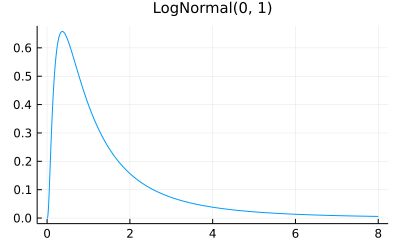

In [10]:
plot(LogNormal(0, 1), 0, 8; label="", title="LogNormal(0, 1)")

### 問題: 対数正規分布の期待値と分散

$Y \sim \op{LogNormal}(\mu,\sigma)$ のとき次が成立することを示せ:

$$
E[Y^m] = e^{m\mu+m^2\sigma^2/2}, \quad
E[Y] = e^{\mu + \sigma^2/2}, \quad
\op{var}(Y) = e^{2\mu + \sigma^2}(e^{\sigma^2} - 1).
$$

__解答例:__ $X = \log Y \sim \op{Normal}(\mu, \sigma)$ となるので, $E[Y^m]$ の計算で正規分布のモーメント母函数に関する結果を使え, 次が得られる:

$$
E[Y^m] = E[e^{mX}] = e^{m\mu+m^2\sigma^2/2}.
$$

ゆえに

$$
\begin{aligned}
&
E[Y] = e^{\mu + \sigma^2/2},
\\ &
\op{var}(Y) = E[Y^2] - E[Y]^2 =
e^{2\mu + 2\sigma^2} - e^{2\mu + \sigma^2} =
e^{2\mu + \sigma^2}(e^{\sigma^2} - 1).
\end{aligned}
$$

__解答終__

## Poisson分布

### Poisson分布の定義

$\lambda > 0$ と仮定する. 確率質量函数

$$
p(k|\lambda) = e^{-\lambda}\frac{\lambda^k}{k!}
\quad (k = 0,1,2,\ldots)
$$

で定義される無限離散分布を __Poisson分布__ (ポアソン分布)と呼び, 次のように表すことにする:

$$
\op{Poisson}(\lambda).
$$

Poisson分布は一定期間に起こるイベントの回数の分布のモデル化としてよく使われている. 

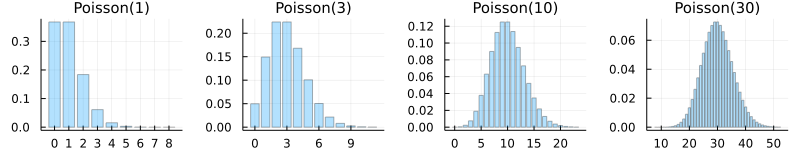

In [6]:
PP = []
for (λ, s) in ((1, 1), (3, 3), (10, 5), (30, 10) )
    x = max(0, round(λ-4√λ)):λ+4√λ+3/√λ
    P = bar(x, k -> pdf(Poisson(λ), k);
        alpha=0.3, label="", title="Poisson($λ)", xtick=0:s:maximum(x))
    push!(PP, P)
end
plot(PP...; size=(800, 150), layout=(1, 4))

以上はPoisson分布 $\op{Poisson}(\lambda)$ の確率質量函数のグラフの例である. ここでは $\lambda$ が整数の場合のみを扱ったが, $\lambda$ は整数でなくてもよい.  $\op{Poisson}(30)$ のグラフは正規分布のグラフに近くなっている.  __パラメータ $\lambda$ が大きなPoisson分布は正規分布で近似される.__

### 問題: Poisson分布のキュムラント母函数と期待値と分散

$K_\lambda \sim \op{Poisson}(\lambda)$ のとき次が成立することを示せ:

$$
\log E[e^{tK_\lambda}] = \lambda(e^t - 1), \quad
E[K_\lambda] = \op{var}(K_\lambda) = \lambda.
$$

さらに $K_\lambda$ の標準化 $Z_\lambda$ を $Z_\lambda = (K_\lambda - \lambda)/\sqrt{\lambda}$ と定めると次が成立することも示せ:

$$
\log E[e^{tZ_\lambda}] =
\log E\left[e^{t(K_\lambda-\lambda)/\sqrt{\lambda}}\right] =
\frac{t^2}{2} + O(\lambda^{-1/2}).
$$

ここで $O(\lambda^{-1/2})$ の部分は $O(\lambda)^{-1/2} = \lambda^{-1/2}\times$ ($\lambda\to\infty$ で有界な量)であることを表している. たとえば, $f(\lambda)$ が $\lambda\to\infty$ で収束するとき, $\lambda^{-1/2}f(\lambda)$ は $O(\lambda^{-1/2})$ と表される.  特に $O(\lambda^{-1/2})$ の部分は $\lambda\to\infty$ で $0$ に収束する.

__解答例:__

$$
\begin{aligned}
&
E[e^{tK_\lambda}] =
e^{-\lambda}\sum_{k=0}^\infty e^{tk}\frac{\lambda^k}{k!} =
e^{-\lambda}\sum_{k=0}^\infty \frac{(\lambda e^t)^k}{k!} =
e^{\lambda(e^t - 1)},
\\ &
\log E[e^{tK_\lambda}] = \lambda(e^t - 1) =
\lambda\left(t + \frac{t^2}{2} + O(t^3)\right) =
\lambda t + \lambda \frac{t^2}{2} + O(t^3).
\end{aligned}
$$

$\log E[e^{tK_\lambda}]$ の展開における $t$, $t^2/2$ の係数がそれぞれ $K_\lambda$ の期待値, 分散になるので

$$
E[K_\lambda] = \op{var}(K_\lambda) = \lambda.
$$

さらに, $Z_\lambda = (K_\lambda - \lambda)/\sqrt{\lambda})$ について

$$
\begin{aligned}
\log E[e^{tZ_\lambda}] &=
\log\left(e^{-\sqrt{\lambda}\, t} E\left[e^{\left(t/\sqrt{\lambda}\right)K_\lambda}\right]\right) =
\log E\left[e^{\left(t/\sqrt{\lambda}\right)K_\lambda}\right] - \sqrt{\lambda}\, t) \\ &=
\lambda\left(e^{t/\sqrt{\lambda}} - 1\right) - \sqrt{\lambda}\, t) =
\lambda\left(\frac{t}{\sqrt{\lambda}} + \frac{t^2}{2\lambda} + O(\lambda^{-3/2})\right) - \sqrt{\lambda}\,t \\ &=
\left(\sqrt{\lambda}\, t  + \frac{t^2}{2} + O(\lambda^{-1/2})\right) - \sqrt{\lambda}\,t =
\frac{t^2}{2} + O(\lambda^{-1/2}).
\end{aligned}
$$

__解答終__

__注意:__ 上の問題の結果より, $K_\lambda \sim \op{Poisson}(\lambda)$, $Z_\lambda = (K_\lambda - \lambda)/\sqrt{\lambda}$, $Z_\infty\sim\op{Normal}(0,1)$ のとき, $\lambda$ を大きくすると $\log E[e^{tZ_\lambda}]$ が $\log E[e^{tZ_\infty}]$ に収束する.  (一般に確率変数 $X$ の分布はそのキュムラント母函数 $\log E[e^{tX}]$ から一意的に決まる.  この点については別のノートで説明する.) これは実は $\lambda$ が大きなとき, $Z_\lambda = (K_\lambda - \lambda)/\sqrt{\lambda}$ の従う分布が標準正規分布で近似されることを意味している.  そのとき, もとの $K_\lambda$ の分布は平均 $\lambda$, 分散 $\lambda$ の正規分布で近似される.  この結果を, __Poisson分布の中心極限定理__ と呼ぶ.

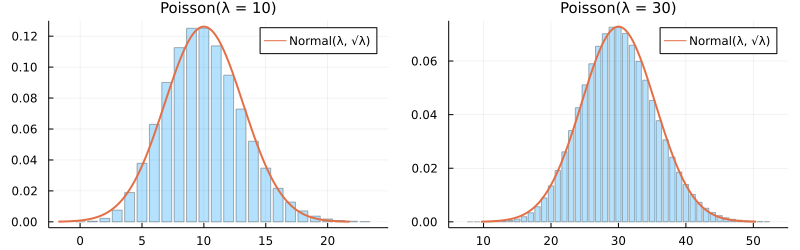

In [8]:
PP = []
for λ in (10, 30)
    P = bar(max(0, round(λ-4√λ)):λ+4√λ+3/√λ, k -> pdf(Poisson(λ), k);
        alpha=0.3, label="", title="Poisson(λ = $λ)")
    plot!(Normal(λ, √λ); label="Normal(λ, √λ)", lw=2)
    push!(PP, P)
end
plot(PP...; size=(800, 250), layout=(1, 2))

### 二項分布の連続時間極限

期待値 $\lambda$ のPoisson分布は同じ期待値を持つ $p$ が小さな二項分布によって近似されることを示そう. 二項分布 $\op{Bonomial}(n, p)$ の期待値は $np$ なので, $p = \lambda/n$ とおくと期待値は $\lambda$ になる. そのように $p$ を定めて, $n\to\infty$ とすると, 以下のように, 二項分布の確率質量函数はPoisson分布の確率質量函数に収束する:

$$
\begin{aligned}
\binom{n}{k}p^k(1-p)^{n-k} &=
\frac{n(n-1)\cdots(n-k+1)}{k!}
\left(\frac{\lambda}{n}\right)^k\left(1-\frac{\lambda}{n}\right)^{n-k} \\ &=
\underbrace{\left(1-\frac{1}{n}\right)\cdots\left(1-\frac{k-1}{n}\right)}_{\to 1}\,
\underbrace{\left(1-\frac{\lambda}{n}\right)^{n-k}}_{\to \exp(-\lambda)}\,
\frac{\lambda^k}{k!} \to
e^{-\lambda} \frac{\lambda^k}{k!}.
\end{aligned}
$$

1つめの等号で二項係数の定義と $p=\lambda/n$ を使い, 2つめの等号で分子の $n(n-1)\cdots(n-k+1)$ を $(\lambda/n)^k = \lambda^k/n^k$ の分母の $n^k$ で割った.  最後に $n\to\infty$ の極限を取った.

この結果は以下のように解釈される.

(1) 二項分布は $n$ 回のBernoulli試行で出る $1$ の個数の分布であった. $1$ が出ることを「イベントが起こった」と解釈しよう.

(2) さらに, その $n$ 回のBernoulli試行を単位時間内に等間隔で行う状況を考える.  これは単位時間幅を $n$ 個に区切る離散時間を考えることに相当する. そのとき, 二項分布は単位時間のあいだに平均して $np$ 回起こるイベントが単位時間内で何回起こるかに関する分布になっている. 

(3) 単位時間内に起こる二項分布に従うイベントの回数の期待値 $\lambda = np$ を固定したままで, $n\to\infty$ とすることは, 時間の刻み幅を細かくする連続時間極限を取ることだと考えられる.  この極限によって, 二項分布はPoisson分布に収束する.

(4) __Poisson分布は, 連続時間の場合に単位時間のあいだに平均して $\lambda$ 回起こるイベントが単位時間内で何回起こるかに関する分布になっている.__

### Poisson分布の中心極限定理と二項分布の中心極限定理の関係

一般に期待値 $\mu$, 標準偏差 $\sigma$ を持つ確率変数 $X$ の __標準化__ $Z$ は $Z=(X-\mu)/\sigma$ と定義される.

そのとき $\log E[e^{tZ}]$ を $X$ の __標準化キュムラント母函数__ と呼ぶ.

標準化キュムラント母函数が正規分布の標準化キュムラント母函数 $t^2/2$ にどれだけ近いかは, その分布が正規分布にどれだけ近いかを表している(この点については後で中心極限定理について一般的に説明するときに再度触れる).

Poisson分布のキュムラント母函数に関する問題の結果によれば,

$$
K_\lambda \sim \op{Poisson}(\lambda), \quad
Z_\lambda = \frac{K_\lambda - \lambda}{\sqrt{\lambda}}
\quad\implies\quad
\log E[e^{tZ_\lambda}] = \frac{t^2}{2} + O(\lambda^{-1/2}).
$$

これより, $\lambda$ を大きくすると, Poisson分布は正規分布で近似されるようになることがわかる. この結果を__Poisson分布の中心極限定理__と呼ぶことにする.

さらに, 前節の結果より, $\lambda = np$ を一定としたままで, $n$ を大きくすると, 二項分布 $\op{Binomial}(n, p)$ はPoisson分布 $\op{Poisson}(\lambda)$ で近似される. 

そのとき注意するべきことは $\op{Binomial}(n, p)$ の分散 $np(1-p)$ は $np = \lambda$ のとき $np(1-p) = \lambda(1-p)$ になり, $p$ が小さくないと, $\op{Poisson}(\lambda)$ の分散 $\lambda$ と全然違う値になってしまうことである(たとえば $p=1/2$ だと二項分布の分散が対応するPoisson分布の分散の半分になってしまう).  二項分布によるPoisson分布の近似は $p$ が小さくないと精度が低くなる.

しかし, 以上の2つの結果を合わせると, Poisson分布の正規分布近似(=中心極限定理)を通して, $p$ は小さいが $np$ が大きい場合の二項分布 $\op{Binomial}(n, p)$ が正規分布で近似されることがわかる.  実際には, $p$ が小さくなくても, $np$ と $n(1-p)$ が大きければ, 二項分布は正規分布でよく近似される. 二項分布が正規分布で近似されるという結果を __二項分布の中心極限定理__ と呼ぶ.

$p$ が小さい場合の二項分布の中心極限定理は応用上あまりににも不完全なので, 後で二項分布を直接正規分布で近似するという $p$ が小さくない場合にも通用する方法で二項分布の中心極限定理を証明する.

__注意:__ 「中心極限定理」は「極限として中心に収束する定理」という意味では __ない__.  「中心極限定理」は「確率論における中心的な極限定理」という意味である.  「中心極限定理」はある種の状況で分布が正規分布で近似されるようになるという結果に付けられた名前である.

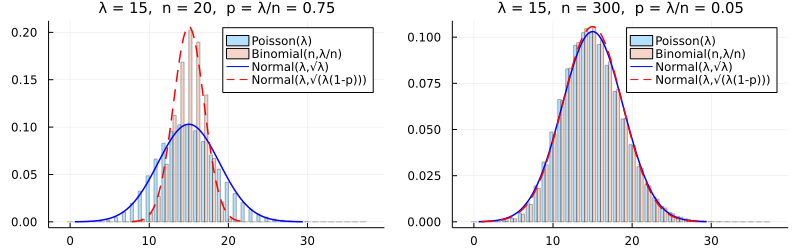

In [16]:
PP = []
for (λ, n) in ((15, 20), (15, 300))
    p = λ/n
    ks = max(0, round(Int, λ-5.5√λ)):round(Int, λ+5.5√λ+3/√λ)
    P = groupedbar(ks, 
        [pdf.(Poisson(λ), ks) pdf.(Binomial(n, λ/n), ks)];
        alpha=0.3,
        label=["Poisson(λ)" "Binomial(n,λ/n)"],
        title="λ = $λ,  n = $n,  p = λ/n = $p")
    plot!(Normal(λ, √λ); label="Normal(λ,√λ)", lw=1.5, c=:blue)
    plot!(Normal(λ, √(λ*(1-p))); label="Normal(λ,√(λ(1-p)))", lw=1.5, ls=:dash, c=:red)
    push!(PP, P)
end
plot(PP...; size=(800, 250), layout=(1, 2))

左側のグラフでは $p = \lambda/n = 3/4$ なので, 二項分布の側の分散はPoisson分布の側の分散の4分の1になっており, 標準偏差については半分になっている.

右側のグラフでは $p = \lambda/n = 1/20$ が小さくなっているので, 二項分布のグラフとPoisson分布のグラフはほとんど一致し, 正規分布による近似もほとんど一致する.

### Poisson分布の中心極限定理の直接証明

パラメータ $\lambda > 0$ を持つPoisson分布の確率質量函数の定義は

$$
p(k|\lambda) = e^{-\lambda}\frac{\lambda^k}{k!}
\quad (k = 0,1,2,\ldots)
$$

であった.  $k$ は $\lambda$ とともに変化するとし, 固定された $x$ について

$$
k = \lambda + \sqrt{\lambda}\, x + o(\sqrt{\lambda})
$$

を満たしていると仮定する($o(\sqrt{\lambda})$ は $\lambda$ で割って $\lambda\to\infty$ とすると $0$ に収束する量).  このとき次が成立することを示せ:

$$
p(k|\lambda) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} \sqrt{\lambda}\,(1 + o(1)).
$$

ここで $o(1)$ は $\lambda\to\infty$ で $0$ に収束する量である.

### Poisson分布の階層化によって負の二項分布が得られる

## ガンマ分布

### 負の二項分布の連続時間極限

### χ²分布

## ベータ分布

### 一様分布の順序統計量

### t分布

### F分布

### 二項分布とベータ分布の累積分布函数の関係